Loaded 672 user profiles from 02data/user_profiles_llm.csv
Figure saved as 02data/radar_chart.png


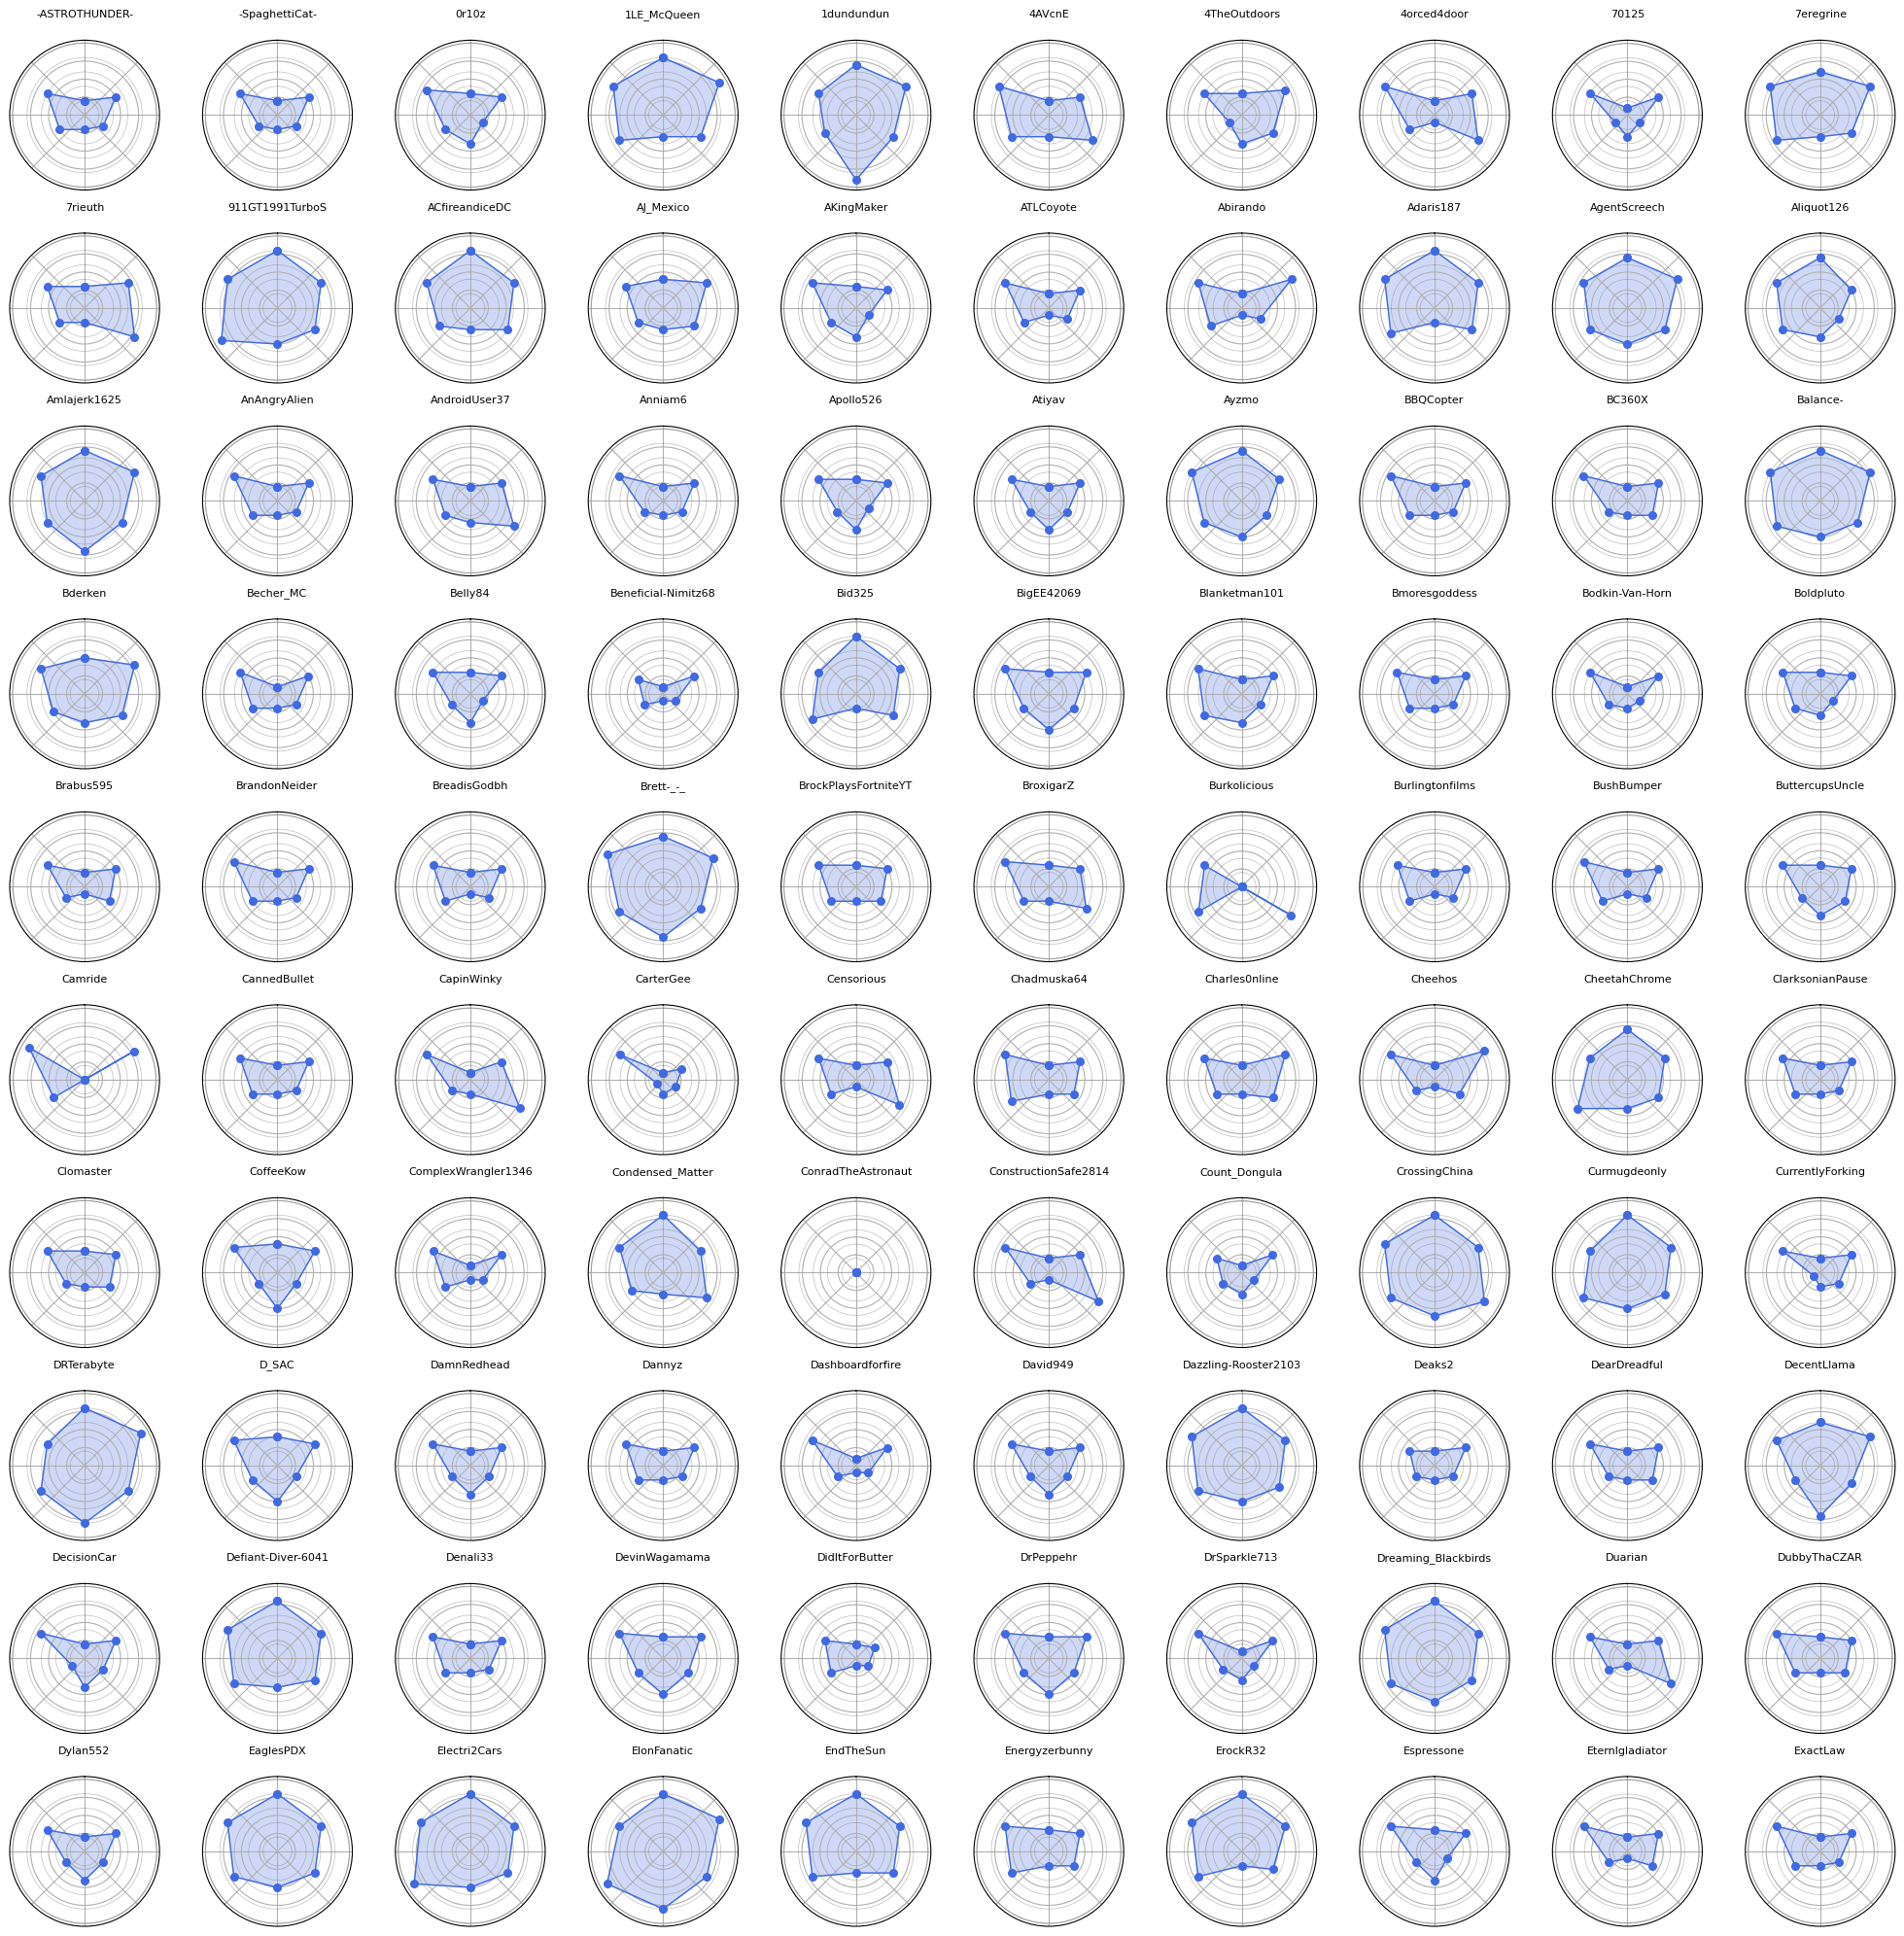

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Define Directories and File Paths ----------------------
data_dir = '02data'
user_profiles_csv = os.path.join(data_dir, 'user_profiles_llm.csv')

# ---------------------- Load User Profiles Data ----------------------
# Load the CSV file containing user profiles with separate quantitative metric columns.
user_profiles = pd.read_csv(user_profiles_csv)
print(f"Loaded {len(user_profiles)} user profiles from {user_profiles_csv}")

# ---------------------- Select the First 100 Users ----------------------
first_100_profiles = user_profiles.head(100)

# Define the list of metric keys (which should correspond to separate columns in your CSV).
metric_keys = [
    "interest",
    "attitude",
    "technical_expertise",
    "adoption_readiness",
    "engagement",
    "communication_clarity"
]

# ---------------------- Define Radar Chart Plotting Function ----------------------
def plot_radar_on_ax(ax, metrics, title=""):
    """
    Plots a radar (spider) chart on the given polar axis (ax) using the provided metrics,
    and sets the subplot title as the userID. No other text labels are shown.
    
    Parameters:
        ax: A matplotlib polar subplot axis.
        metrics: A list of numeric values corresponding to the predefined metric_keys.
        title: The userID to be displayed as the chart title.
    """
    # Convert metrics to floats and close the polygon by appending the first value.
    values = [float(val) for val in metrics]
    values.append(values[0])
    
    # Determine the number of metrics and calculate the angle for each metric.
    num_vars = len(metric_keys)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles.append(angles[0])
    
    # Configure the polar axis: rotate so that the first metric is at the top and go clockwise.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Plot the radar chart outline and fill it.
    ax.plot(angles, values, color='royalblue', linewidth=1)
    ax.fill(angles, values, color='royalblue', alpha=0.25)
    ax.scatter(angles, values, color='royalblue', s=30, zorder=5)
    
    # Remove all axis tick labels.
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Optionally, draw gridlines for specified radii.
    for r in [2, 4, 6, 8, 10]:
        ax.plot(np.linspace(0, 2*np.pi, 100), [r]*100, color='gray', linewidth=0.5, alpha=0.5)
    
    # Set only the title using the provided userID.
    ax.set_title(title, fontsize=8, y=1.10)

# ---------------------- Create Radar Charts for First 100 Users ----------------------
# Create a grid of polar subplots (10 x 10 grid for 100 users).
fig, axes = plt.subplots(10, 10, figsize=(20, 20), subplot_kw=dict(polar=True))
axes = axes.flatten()

# Loop over the first 100 profiles and plot each as a radar chart.
for i, (_, row) in enumerate(first_100_profiles.iterrows()):
    ax = axes[i]
    user_name = row.get("author", "Unknown")
    
    # Extract metric values from the corresponding columns in the CSV.
    metrics_values = [row.get(key, 0) for key in metric_keys]
    
    # Plot the radar chart for this user, labeling only with the userID.
    plot_radar_on_ax(ax, metrics_values, title=user_name)

# Remove any extra subplots if there are fewer than 100 users.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the combined figure as a high-DPI image.
output_file = os.path.join(data_dir, "radar_chart.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Figure saved as {output_file}")

plt.show()

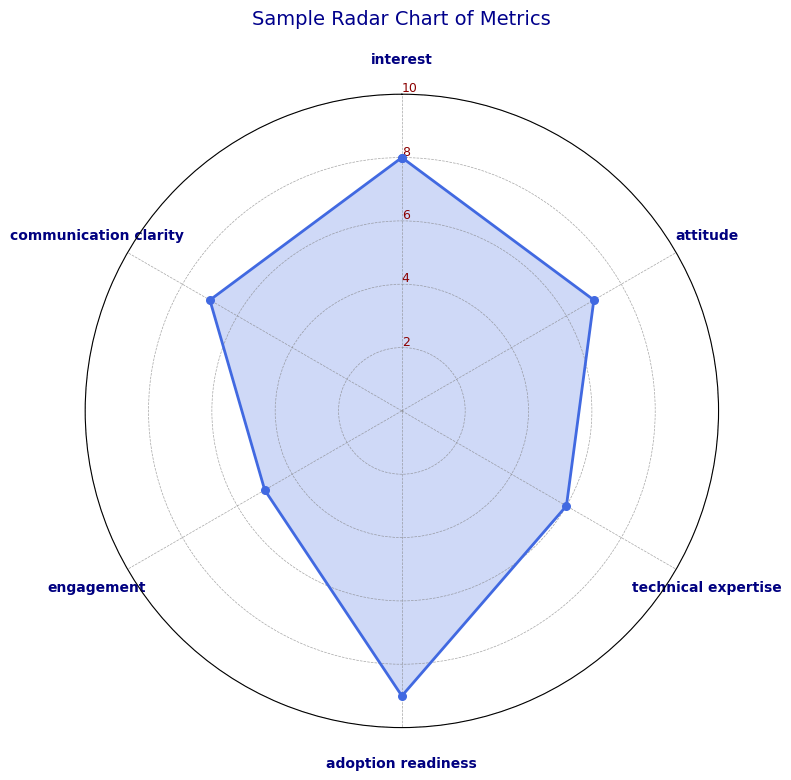

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metric names (underscores replaced with spaces)
metric_keys = [
    "interest",
    "attitude",
    "technical expertise",
    "adoption readiness",
    "engagement",
    "communication clarity"
]

# Sample values for demonstration (each value between 0 and 10)
sample_values = [8, 7, 6, 9, 5, 7]
# Append the first value to the end to close the polygon.
values = sample_values + [sample_values[0]]

# Number of metrics
num_vars = len(metric_keys)

# Compute the angle for each axis in radians.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop by appending the first angle at the end

# Create a polar subplot for the radar chart.
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Configure the polar axis:
# - Set the first axis (metric) at the top.
# - Set direction to clockwise.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Plot the radar chart (line and filled polygon).
ax.plot(angles, values, color='royalblue', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='royalblue', alpha=0.25)
ax.scatter(angles, values, color='royalblue', s=30, zorder=5)

# Set the metric names as labels on the x-axis.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metric_keys, fontsize=10, fontweight='bold', color='navy')
# Use tick_params to adjust the padding for the x-axis labels.
ax.tick_params(axis='x', pad=15)

# Configure the radial (y-axis) ticks:
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(["2", "4", "6", "8", "10"], fontsize=9, color='darkred')
ax.set_rlabel_position(0)  # set the position of radial labels

# Add gridlines for clarity.
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Set an overall title for the chart.
plt.title("Sample Radar Chart of Metrics", fontsize=14, color='darkblue', pad=20)

plt.tight_layout()
plt.show()